### K-Nearest Neighbor Experiment

This code will allow us to debug our learning algorithms, and gain some more insight into what could be causing points of failure in terms of our effort to predict the year a song was released. This work is built off of the ideas presented in section 4 of the MSD paper: https://www.ee.columbia.edu/~dpwe/pubs/BertEWL11-msd.pdf 


In [1]:
%matplotlib notebook
import matplotlib
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn import preprocessing

In [141]:
labels = []
examples = []
print "GETTING DATASET"
print
# Replace filename with the path to the CSV where you have the year predictions data saved.
filename = "/mnt/c/Users/Aumit/Desktop/YearPredictionMSD.txt/yp.csv"
with open(filename, 'r') as f:
    for line in f:
        content = line.split(",")
        
        labels.append(float(content[0]))

        content.pop(0)

        # If we wanted pure lists
        content = [float(elem) for elem in content]
        #content = map(float, content)

        # If we want a list of numpy arrays, not necessary
        #npa = np.asarray(content, dtype=np.float64)

        examples.append(content)

print "SPLITTING TRAINING AND TEST SETS"
print 
# Turning lists into numpy arrays
total_array = np.array(examples)

# Scale the features so they have 0 mean
#total_scaled = preprocessing.scale(total_array)

# Numpy array of the labels 
total_labels = np.array(labels)
# 
# Split training and test:
# Increase or decrease these sizes
# Currently using first 10000 examples as training data
# Last 1000 as test data
training_examples = total_array[:200000]
#training_examples = random.sample(total_array, 10)
training_labels = total_labels[:200000]

# Use the following 1000 examples as text examples
test_examples = total_array[200000:205000]
test_labels = total_labels[200000:205000]

GETTING DATASET

SPLITTING TRAINING AND TEST SETS



In [3]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [4]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [5]:
distances

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356]])

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
neigh = KNeighborsClassifier(n_neighbors=100)

In [143]:
neigh.fit(training_examples, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [100]:
print training_examples[0]

[  4.99435700e+01   2.14711400e+01   7.30775000e+01   8.74861000e+00
  -1.74062800e+01  -1.30990500e+01  -2.50120200e+01  -1.22325700e+01
   7.83089000e+00  -2.46783000e+00   3.32136000e+00  -2.31521000e+00
   1.02055600e+01   6.11109130e+02   9.51089600e+02   6.98114280e+02
   4.08984850e+02   3.83709120e+02   3.26515120e+02   2.38113270e+02
   2.51424140e+02   1.87173510e+02   1.00426520e+02   1.79194980e+02
  -8.41558000e+00  -3.17870380e+02   9.58626600e+01   4.81025900e+01
  -9.56630300e+01  -1.80621500e+01   1.96984000e+00   3.44243800e+01
   1.17267000e+01   1.36790000e+00   7.79444000e+00  -3.69940000e-01
  -1.33678520e+02  -8.32616500e+01  -3.72976500e+01   7.30466700e+01
  -3.73668400e+01  -3.13853000e+00  -2.42153100e+01  -1.32306600e+01
   1.59380900e+01  -1.86047800e+01   8.21547900e+01   2.40579800e+02
  -1.02940700e+01   3.15843100e+01  -2.53818700e+01  -3.90772000e+00
   1.32925800e+01   4.15506000e+01  -7.26272000e+00  -2.10086300e+01
   1.05508480e+02   6.42985600e+01

In [144]:
predictions = neigh.predict(test_examples)

In [113]:
neigh.score(test_examples, test_labels)

0.057000000000000002

In [145]:
predictions.shape

(5000,)

In [146]:
test_labels.shape

(5000,)

In [147]:
squared_dist = []
test_examples = test_examples.astype(float)
test_labels = test_labels.astype(float)
for x, y in zip(test_labels, predictions):
    print str(x) + " --- " + str(y) + "---" + str(abs(x - y))
    #print y
    #print np.square(x-y)
    #squared_dist.append(np.square(x-y))
    #squared_dist.append(np.linalg.norm(test_labels - predictions))
    squared_dist.append(abs(x - y))
    #print type(y)
squared_dist

2006.0 --- 2003.0---3.0
1989.0 --- 2004.0---15.0
2006.0 --- 1993.0---13.0
1967.0 --- 2007.0---40.0
2006.0 --- 1994.0---12.0
1967.0 --- 2007.0---40.0
2002.0 --- 2006.0---4.0
2006.0 --- 1990.0---16.0
1997.0 --- 2005.0---8.0
2002.0 --- 2004.0---2.0
1990.0 --- 2005.0---15.0
1962.0 --- 2007.0---45.0
1989.0 --- 2008.0---19.0
1967.0 --- 1993.0---26.0
1967.0 --- 2009.0---42.0
1966.0 --- 2005.0---39.0
2007.0 --- 2006.0---1.0
2006.0 --- 2006.0---0.0
2007.0 --- 2005.0---2.0
2007.0 --- 2004.0---3.0
2007.0 --- 2002.0---5.0
2007.0 --- 2006.0---1.0
2007.0 --- 2006.0---1.0
1990.0 --- 2005.0---15.0
1958.0 --- 2004.0---46.0
1958.0 --- 1994.0---36.0
1959.0 --- 2005.0---46.0
1972.0 --- 2007.0---35.0
1989.0 --- 2007.0---18.0
1959.0 --- 2005.0---46.0
1958.0 --- 2003.0---45.0
1989.0 --- 1998.0---9.0
1959.0 --- 2005.0---46.0
1959.0 --- 1992.0---33.0
1959.0 --- 2006.0---47.0
1958.0 --- 2005.0---47.0
1959.0 --- 1994.0---35.0
1959.0 --- 2007.0---48.0
1995.0 --- 2006.0---11.0
1959.0 --- 2005.0---46.0
1985.0 --- 2

1993.0 --- 1997.0---4.0
1993.0 --- 2005.0---12.0
2004.0 --- 2006.0---2.0
2003.0 --- 2006.0---3.0
2003.0 --- 2007.0---4.0
2003.0 --- 2000.0---3.0
2003.0 --- 2002.0---1.0
2003.0 --- 2006.0---3.0
2003.0 --- 2005.0---2.0
2003.0 --- 2007.0---4.0
2003.0 --- 2007.0---4.0
2003.0 --- 2006.0---3.0
2003.0 --- 2000.0---3.0
2005.0 --- 2008.0---3.0
2005.0 --- 2009.0---4.0
2005.0 --- 2009.0---4.0
2005.0 --- 2006.0---1.0
2005.0 --- 2005.0---0.0
2005.0 --- 2005.0---0.0
2005.0 --- 2005.0---0.0
2005.0 --- 2007.0---2.0
2005.0 --- 2004.0---1.0
2007.0 --- 2006.0---1.0
2007.0 --- 2006.0---1.0
2007.0 --- 2005.0---2.0
2007.0 --- 2009.0---2.0
2007.0 --- 2006.0---1.0
2007.0 --- 2009.0---2.0
2007.0 --- 2006.0---1.0
2001.0 --- 2006.0---5.0
2001.0 --- 2008.0---7.0
2001.0 --- 2007.0---6.0
2001.0 --- 2004.0---3.0
2001.0 --- 2009.0---8.0
2001.0 --- 2007.0---6.0
2001.0 --- 2005.0---4.0
2001.0 --- 2006.0---5.0
2001.0 --- 2006.0---5.0
2001.0 --- 2005.0---4.0
2001.0 --- 2006.0---5.0
2001.0 --- 2005.0---4.0
2001.0 --- 2006

1970.0 --- 2007.0---37.0
1970.0 --- 2006.0---36.0
1970.0 --- 2006.0---36.0
1973.0 --- 1996.0---23.0
1995.0 --- 2007.0---12.0
1970.0 --- 2004.0---34.0
1995.0 --- 1999.0---4.0
1995.0 --- 2006.0---11.0
1995.0 --- 2006.0---11.0
1972.0 --- 1995.0---23.0
1971.0 --- 1998.0---27.0
1971.0 --- 2007.0---36.0
1971.0 --- 1997.0---26.0
1971.0 --- 1995.0---24.0
1971.0 --- 2007.0---36.0
1995.0 --- 2007.0---12.0
1970.0 --- 2008.0---38.0
1973.0 --- 2004.0---31.0
1995.0 --- 2004.0---9.0
1995.0 --- 1987.0---8.0
1995.0 --- 2004.0---9.0
1995.0 --- 2009.0---14.0
1995.0 --- 2005.0---10.0
1995.0 --- 2004.0---9.0
1995.0 --- 2006.0---11.0
1995.0 --- 2006.0---11.0
1971.0 --- 2005.0---34.0
1974.0 --- 2007.0---33.0
1995.0 --- 2007.0---12.0
1995.0 --- 2008.0---13.0
1970.0 --- 2007.0---37.0
1970.0 --- 2007.0---37.0
2003.0 --- 2007.0---4.0
1970.0 --- 2007.0---37.0
1971.0 --- 2004.0---33.0
1972.0 --- 2006.0---34.0
1973.0 --- 2007.0---34.0
1970.0 --- 2007.0---37.0
1970.0 --- 2002.0---32.0
1973.0 --- 2007.0---34.0
1974.0

[3.0,
 15.0,
 13.0,
 40.0,
 12.0,
 40.0,
 4.0,
 16.0,
 8.0,
 2.0,
 15.0,
 45.0,
 19.0,
 26.0,
 42.0,
 39.0,
 1.0,
 0.0,
 2.0,
 3.0,
 5.0,
 1.0,
 1.0,
 15.0,
 46.0,
 36.0,
 46.0,
 35.0,
 18.0,
 46.0,
 45.0,
 9.0,
 46.0,
 33.0,
 47.0,
 47.0,
 35.0,
 48.0,
 11.0,
 46.0,
 17.0,
 46.0,
 11.0,
 45.0,
 0.0,
 13.0,
 40.0,
 4.0,
 18.0,
 47.0,
 46.0,
 22.0,
 47.0,
 46.0,
 46.0,
 46.0,
 46.0,
 11.0,
 50.0,
 17.0,
 47.0,
 46.0,
 46.0,
 47.0,
 47.0,
 48.0,
 46.0,
 35.0,
 6.0,
 13.0,
 1.0,
 6.0,
 4.0,
 2.0,
 3.0,
 3.0,
 4.0,
 4.0,
 6.0,
 6.0,
 16.0,
 11.0,
 9.0,
 1.0,
 9.0,
 6.0,
 0.0,
 1.0,
 5.0,
 1.0,
 9.0,
 4.0,
 5.0,
 3.0,
 1.0,
 9.0,
 4.0,
 1.0,
 3.0,
 5.0,
 3.0,
 2.0,
 4.0,
 3.0,
 3.0,
 7.0,
 29.0,
 0.0,
 0.0,
 2.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 11.0,
 2.0,
 3.0,
 1.0,
 2.0,
 1.0,
 4.0,
 0.0,
 1.0,
 2.0,
 1.0,
 2.0,
 2.0,
 5.0,
 2.0,
 1.0,
 1.0,
 3.0,
 12.0,
 4.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 7.0,
 2.0,
 8.0,
 1.0,
 1.0,
 10.0,
 2.0,
 8.0,
 6.0,
 8.0,
 6.0,
 8.

In [148]:
np.mean(squared_dist)

7.7964000000000002

In [149]:
tot = 0
for j in squared_dist:
    tot += j
mean_val = tot/(len(squared_dist))
print mean_val
    

7.7964


The above shows us that with K-nearest neighbors, the predictions produced by this algorithm are producing years in the same generation on average. What if we made a new set of labels, but this time, instead of specific years, we tested in against a range?

In [150]:
acc_count = 0
for w, p in zip(test_labels, predictions):
    if(abs(w - p) <= 10):
       # print "lol"
        acc_count += 1

acc_count/float(len(test_labels)) * 100

76.42

Aha! From the above it's obvious that k-nearest neighbor is doing fairly well in terms of getting in the neighborhodod (no pun intended) of the actual year a song is released! This above accuracy is the result of looking at unscaled features... what if we scaled them? 

In [200]:
# Let's create some bins
hist_helper_preds = []
hist_labels = []
for r in predictions:
    if 1920 <= r <= 1930:
        hist_helper_preds.append("1920-1930")
    elif 1931 <= r <= 1940:
        hist_helper_preds.append("1931-1940")
    elif 1941 <= r <= 1950:
        hist_helper_preds.append("1941-1940")
    elif 1951 <= r <= 1960:
        hist_helper_preds.append("1951-1960")
    elif 1961 <= r <= 1970:
        hist_helper_preds.append("1961-1970")
    elif 1971 <= r <= 1980:
        hist_helper_preds.append("1971-1980")
    elif 1981 <= r <= 1990:
        hist_helper_preds.append("1981-1990")
    elif 1991 <= r <= 2000:
        hist_helper_preds.append("1991-2000")
    elif 2001 <= r <= 2011:
        hist_helper_preds.append("2001-2011")
    
for q in test_labels:
    if 1920 <= q <= 1930:
        hist_labels.append("1920-1930")
    elif 1931 <= q <= 1940:
        hist_labels.append("1931-1940")
    elif 1941 <= q <= 1950:
        hist_labels.append("1941-1940")
    elif 1951 <= q <= 1960:
        hist_labels.append("1951-1960")
    elif 1961 <= q <= 1970:
        hist_labels.append("1961-1970")
    elif 1971 <= q <= 1980:
        hist_labels.append("1971-1980")
    elif 1981 <= q <= 1990:
        hist_labels.append("1981-1990")
    elif 1991 <= q <= 2000:
        hist_labels.append("1991-2000")
    elif 2001 <= q <= 2011:
        hist_labels.append("2001-2011")

In [201]:
import pandas 
from collections import Counter
#range_counts = Counter(hist_helper)
#df = pandas.DataFrame.from_dict(range_counts, orient='index')
conv_range_preds = dict((h, hist_helper_preds.count(h)) for h in hist_helper_preds)
conv_range_labels = dict((i, hist_labels.count(i)) for i in hist_labels)
print "Prediction freqs"
print conv_range_preds

print "Label freqs"
print conv_range_labels
#df.plot(kind='bar')
#plt.hist(helper, bins = 10)

Prediction freqs
{'1981-1990': 80, '1971-1980': 11, '2001-2011': 4358, '1961-1970': 3, '1991-2000': 545, '1951-1960': 3}
Label freqs
{'1981-1990': 359, '1941-1940': 2, '1971-1980': 158, '2001-2011': 2778, '1991-2000': 1529, '1951-1960': 61, '1961-1970': 113}


<IPython.core.display.Javascript object>


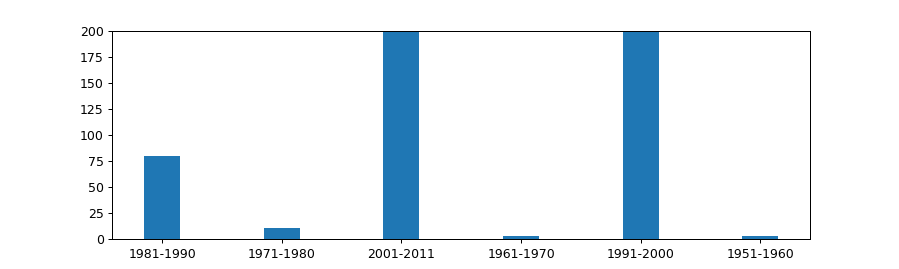

(0, 200)

In [232]:
#bins = np.arange(-100, 100, 5) # fixed bin size
centers = range(len(conv_range_preds))
centers_labels = range(len(conv_range_labels))

plt.figure(figsize=(10, 3)) 
#plt.bar(centers_labels, conv_range_labels.values(), tick_label=conv_range_labels.keys(),  align='center', width=0.3)
plt.bar(centers, conv_range_preds.values(), tick_label=conv_range_preds.keys() ,align='center', width=0.3)

plt.ylim([0, 200])
#plt.hist(np.array(hist_helper))

<IPython.core.display.Javascript object>


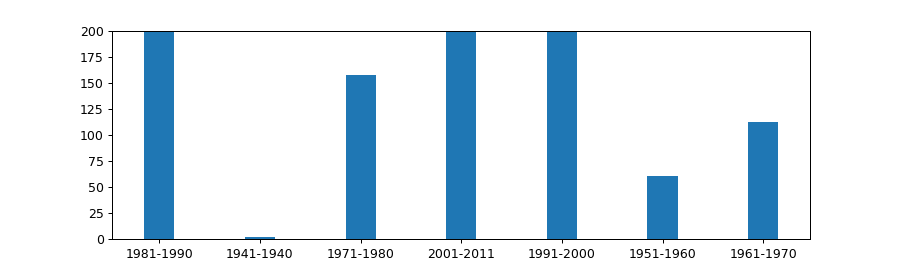

(0, 200)

In [233]:
plt.figure(figsize=(10, 3)) 
plt.bar(centers_labels, conv_range_labels.values(), tick_label=conv_range_labels.keys(),  align='center', width=0.3)
#plt.bar(centers, conv_range_preds.values(), align='center', width=0.3)

plt.ylim([0, 200])

The graphs are more or less similar. Let's see what kind of results we get if we actually scale our features.

In [236]:
total_array = np.array(examples)

# Scale the features so they have 0 mean#total_scaled = preprocessing.scale(total_array)

# Numpy array of the labels 
total_labels = np.array(labels)
# 
# Split training and test:
# Increase or decrease these sizes
# Currently using first 10000 examples as training data
# Last 1000 as test data
training_examples = total_scaled[:200000]
#training_examples = random.sample(total_array, 10)
training_labels = total_labels[:200000]

# Use the following 1000 examples as text examples
test_examples = total_scaled[200000:205000]
test_labels = total_labels[200000:205000]

In [ ]:
neigh_scaled = KNeighborsClassifier(n_neighbors=100)
neigh_scaled.fit(training_examples, training_labels)
predictions_scaled = neigh.predict(test_examples)
neigh_scaled.score(test_examples, test_labels)

squared_dist_scaled = []
test_examples = test_examples.astype(float)
test_labels = test_labels.astype(float)
for f, e in zip(test_labels, predictions):
    print str(f) + " --- " + str(e) + "---" + str(abs(f - e))
    #print y
    #print np.square(x-y)
    #squared_dist.append(np.square(x-y))
    #squared_dist.append(np.linalg.norm(test_labels - predictions))
    squared_dist_scaled.append(abs(f - e))
    #print type(y)
#squared_dist